## 1. Критерий информативности с нуля

как мы разобрали, построение дерева зависит от следующих факторов:
* вид правила разбиения
* критерий информативности
* критерий останова
* метод стрижки
* проблема пропусков

пройдёмся критериям информативности

In [1]:
import numpy as np
from collections import Counter

*Нам понадобятся две библиотеки: numpy вы знаете, а объект класса Counter в заданном списке просто подсчитывает количество вхождений каждого элемента и возвращает результат в виде словаря. Пример:*

In [2]:
t = Counter([9,9,9,7,7])
t.values()

dict_values([3, 2])

Ниже представлена функция для расчёта энтропийного критерия качества:

$H(R) = -\sum_{k=1}^{K}p_klogp_k$

In [3]:
l = [1, 1, 2, 1, 2, 3]
length = len(l)
length

6

In [4]:
cnt = Counter(l).values()
cnt

dict_values([3, 2, 1])

In [5]:
ps = [v / length for v in cnt]
ps

[0.5, 0.3333333333333333, 0.16666666666666666]

In [6]:
HR = -sum([p * np.log(p) for p in ps])
HR

1.0114042647073516

In [7]:
del(l)
l = [1, 2, 1, 2, 1, 1, 3, 3, 3]

In [8]:
def HEntropy(l):
    lenght = len(l)
    cnt = Counter(l).values()
    ps = [v / length for v in cnt]
    H = -sum([p * np.log(p) for p in ps])
    return H

In [9]:
HEntropy(l)

0.9830877585747855

**Задание.** По аналогии с *энтропийным критерием* заполните функции *критерия Джини*

In [10]:
def HGini(l):
    lenght = len(l)
    cnt = Counter(l).values()
    ps = [v / length for v in cnt]
    H = sum([p * (1 - p) for p in ps])
    return H

In [11]:
HGini(l)

0.6944444444444444

In [12]:
def IG(H, l, i):
    length = len(l)
    return H(l) - i / length * H(l[:i]) - (length - i) / length * H (l[i:])

In [13]:
IG(HGini, l, 5)

0.25925925925925924

In [14]:
def test_H(H, l):
    print("{:5} {:3}   {:4} {:4} {:4}".format("#","l","IG","Hl","Hr"))
    print("-"*24)
    for i in range(1,len(l)):
        print("{:2}. {:3}   {:.2f} {:.2f} {:.2f}".format(i, l[i], IG(H, l, i), H(l[:i]), H(l[i:])))

In [15]:
l = [1]*5 + [2]*3 + [1]*4
print(l)

[1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1]


In [16]:
test_H(HEntropy, l)

#     l     IG   Hl   Hr  
------------------------
 1.   1   -0.25 0.30 -0.04
 2.   1   -0.46 0.37 0.17
 3.   1   -0.61 0.35 0.35
 4.   1   -0.68 0.27 0.50
 5.   2   -0.68 0.15 0.62
 6.   2   -0.81 0.45 0.64
 7.   2   -0.80 0.52 0.57
 8.   1   -0.68 0.50 0.27
 9.   1   -0.61 0.35 0.35
10.   1   -0.46 0.17 0.37
11.   1   -0.25 -0.04 0.30


In [17]:
test_H(HGini, l[5:])

#     l     IG   Hl   Hr  
------------------------
 1.   2   0.07 0.14 0.44
 2.   2   0.15 0.22 0.36
 3.   1   0.24 0.25 0.22
 4.   1   0.14 0.39 0.25
 5.   1   0.07 0.47 0.22
 6.   1   0.02 0.50 0.14


### 2. Визуализация принятия решений классификатором sklearn

#### 1. Используем данные о цветках Ириса

In [18]:
from sklearn.datasets import load_iris
import pandas as pd

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
iris = load_iris()

In [21]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])
df = pd.concat([X, y], axis=1)

In [22]:
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

Выведем попарное распределение фичей датасета с раскраской по виду цветка

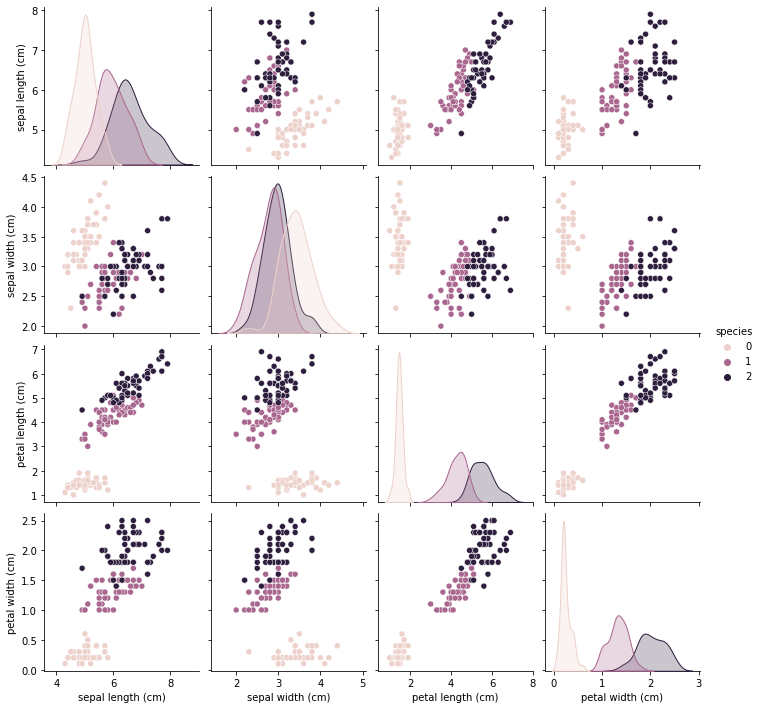

In [24]:
sns.pairplot(df, hue='species', diag_kind='kde');

Визуально кажется,  что ширина листа(petal width) даже самостоятельно может отделить 2 класса друг от друга идеально, а ещё
для двух понадобится одна фича.
Возьмем пока для возможности отобразить в 2D две фичи, длину и ширину листка

In [25]:
Xcut = X[X.columns[2:4]]

In [26]:
Xcut

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


#### 2. Используем классификатор

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
#DecisionTreeClassifier?

In [29]:
clf = DecisionTreeClassifier()

In [30]:
clf.fit(Xcut, y)

DecisionTreeClassifier()

In [31]:
clf.predict([[1,1], [3,3]])

array([0, 2])

In [32]:
clf.predict_proba([[1,1], [3,3]])

array([[1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667]])

Супер, можем теперь предсказывать. Давайте визуализаируем границу принятия решений. Для удобства  эксперементирования я упаковал всё в функцию test_clf, в нее передаётся созданный классификатор и при установленном  fit_clf=True обучается внутри, а затем отрисовывает границу. Таким образом можно эксперементировать с параметрами классификатора.

In [33]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

In [34]:
def test_clf(clf, X, y, cmap=None, fit_clf=False):
    xx, yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')
    plt.scatter(X.values[:, 0], X.values[:, 1], c='g', s=100, cmap=cmap or 'spring', edgecolors='black')
    if fit_clf:
        return clf

Пробуем при разной глубине

<ipython-input-34-e5202ed586f5>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')


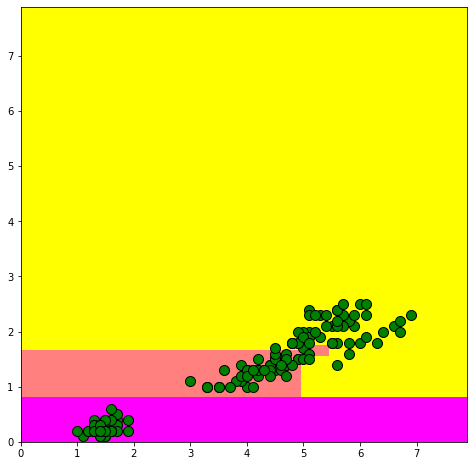

In [35]:
clf = test_clf(DecisionTreeClassifier(), Xcut, y, fit_clf=True)

обратите внимание, один блок занимает то позицию снизу, то слева: данных недостаточно для принятия однозначного решения и экстраполяция идёт произвольно

#### 3. Визуализируем само дерево

Возможно, самое замечательное свойство одиночных деревьев - возможность визуализировать их алгоритм работы и затем объяснить его хоть человеку, хоть машине

Дерево можно как-то отобразить внутри ipython-ноутбука с помощью библиотеки pydot и установлнного webgraphviz, но мы воспользуемся скорее онлайн-сервисом http://www.webgraphviz.com

Сгенерируем код дерева в формате .dot и скопируем его на сайт

In [36]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [37]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(Xcut, y)

DecisionTreeClassifier(max_depth=3)

In [38]:
get_tree_dot_view(clf, list(Xcut.columns), iris.target_names)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor", fillcolor="#4de88e"] ;
2 -> 3 ;
4 [label="gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor", fillcolor="#3de684"] ;
3 -> 4 ;
5 [label="gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica", fillcolor="#c09cf2"] ;
3 -> 5 ;
6 [label="petal length (cm) <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica

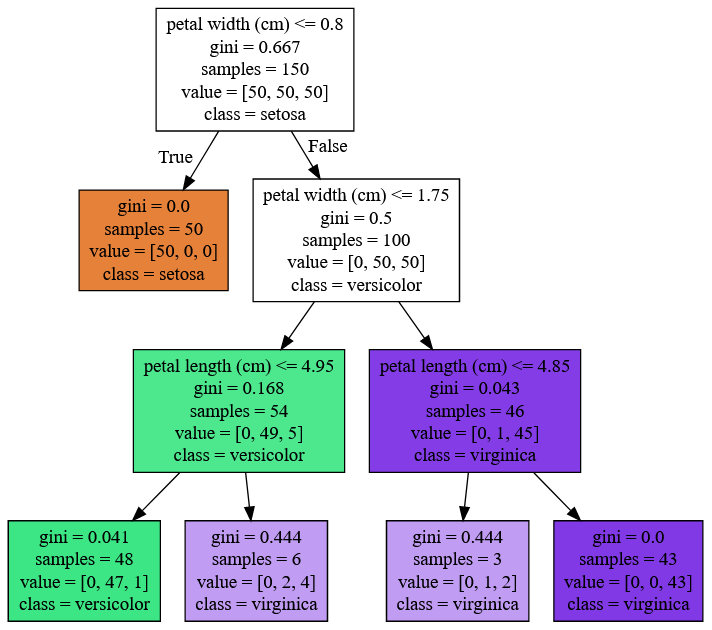

----------

#### 4. Оценка важности фичей

Важность зависит от конкретного прогона классификатора, это не объективный показатель
*пробуем на разной глубине*

''

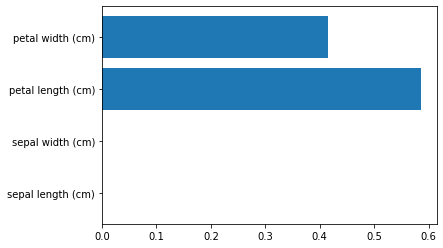

In [39]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
''

#### 5. Переобучение наглядно

*здесь я использую генерацию датасета из [блога](https://habrahabr.ru/company/ods/blog/322534/) open data science*

In [40]:
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
train_data = pd.DataFrame(train_data)

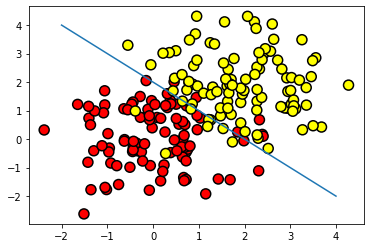

In [41]:
plt.scatter(train_data[0], train_data[1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2, 5), range(4, -3, -1));

*пробуем при разной глубине*

<ipython-input-34-e5202ed586f5>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')


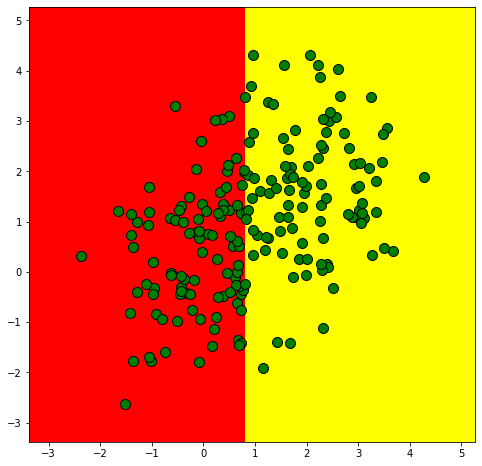

In [42]:
clf = test_clf(DecisionTreeClassifier(max_depth=1), train_data, train_labels, cmap='autumn', fit_clf=True)

<ipython-input-34-e5202ed586f5>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')


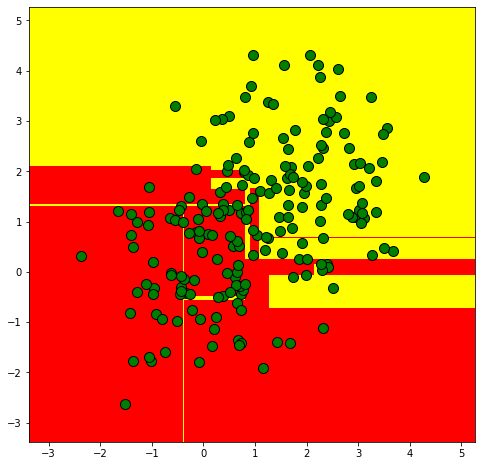

In [43]:
clf = test_clf(DecisionTreeClassifier(), train_data, train_labels, cmap='autumn', fit_clf=True)

In [45]:
get_tree_dot_view(clf, feature_names=['x', 'y'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="x <= 0.793\ngini = 0.5\nsamples = 200\nvalue = [100, 100]", fillcolor="#ffffff"] ;
1 [label="y <= 2.094\ngini = 0.23\nsamples = 98\nvalue = [85, 13]", fillcolor="#e99457"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="y <= 1.641\ngini = 0.123\nsamples = 91\nvalue = [85, 6]", fillcolor="#e78a47"] ;
1 -> 2 ;
3 [label="y <= 1.317\ngini = 0.069\nsamples = 84\nvalue = [81, 3]", fillcolor="#e68640"] ;
2 -> 3 ;
4 [label="x <= -0.407\ngini = 0.049\nsamples = 79\nvalue = [77, 2]", fillcolor="#e6843e"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 32\nvalue = [32, 0]", fillcolor="#e58139"] ;
4 -> 5 ;
6 [label="x <= -0.377\ngini = 0.081\nsamples = 47\nvalue = [45, 2]", fillcolor="#e68742"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5"] ;
6 -> 7 ;
8 [label="y <= -0.489\ngini = 0.043\nsamples = 46\nvalue = [45, 1]", fillcolor="#e6843d"] ;
6 -> 8 ;
9 [label="y <= -